# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
!pip install citipy

In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

print(weather_api_key)


8686a7103774289fc61c5f80d9e034a9


In [3]:
output_data_file

'output_data/cities.csv'

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
url=f"https://api.openweathermap.org/data/2.5/weather?units=Imperial&appid={weather_api_key}"
print(url)

city_data = []

print("-" * 15)
record_count = 1
set_count = 1
for index, city in enumerate(cities):
    #Group cities in sets of 50 for logging purpose
    if (index % 50 == 0 and index >= 50):
        set_count += 1
        record_count = 0
        
    city_url = url + "&q=" + city
    
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    record_count += 1
    
    try:
        #print(city_url)
        city_weather = requests.get(city_url).json()
       # print(city_weather)
        
        city_lat = city_weather["coord"]["lat"]
            
        city_lng = city_weather["coord"]["lon"]
        
        city_max_temp = city_weather["main"]["temp_max"]
        
        city_humidity = city_weather["main"]["humidity"]
        
        city_clouds = city_weather["clouds"]["all"]
        
        city_winds = city_weather["wind"]["speed"]
        
        city_country = city_weather["sys"]["country"]
        
        city_date = city_weather["dt"]
        
        city_data.append({
            
            "City": city,
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_winds,
            "Country": city_country,
            "Date": city_date

        })
    except:
        print("City not found. Skipping....")
        pass

print("Data Retrieval Complete")



https://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8686a7103774289fc61c5f80d9e034a9
---------------
Processing Record 1 of Set 1 | kavieng
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | egvekinot
Processing Record 4 of Set 1 | puerto ayora
Processing Record 5 of Set 1 | adamantina
Processing Record 6 of Set 1 | vaini
Processing Record 7 of Set 1 | ramos arizpe
Processing Record 8 of Set 1 | tuatapere
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | skibbereen
Processing Record 11 of Set 1 | ust-tsilma
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | rauma
Processing Record 14 of Set 1 | bluff
Processing Record 15 of Set 1 | saint george
Processing Record 16 of Set 1 | victoria
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | kapaa
Processing Record 19 of Set 1 | sisimiut
Processing Record 20 of Set 1 | hobart
Processing Record 21 of Set 1 | butaritari
Processing Record 22 of Se

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
city_data

[{'City': 'ushuaia',
  'Lat': -54.8,
  'Lng': -68.3,
  'Max Temp': 40.66,
  'Humidity': 93,
  'Cloudiness': 75,
  'Wind Speed': 6.91,
  'Country': 'AR',
  'Date': 1629149670},
 {'City': 'hue',
  'Lat': 16.4667,
  'Lng': 107.6,
  'Max Temp': 80.71,
  'Humidity': 74,
  'Cloudiness': 20,
  'Wind Speed': 2.3,
  'Country': 'VN',
  'Date': 1629150188},
 {'City': 'ayan',
  'Lat': 56.45,
  'Lng': 138.1667,
  'Max Temp': 69.1,
  'Humidity': 67,
  'Cloudiness': 10,
  'Wind Speed': 3.87,
  'Country': 'RU',
  'Date': 1629150189},
 {'City': 'zhigansk',
  'Lat': 66.7697,
  'Lng': 123.3711,
  'Max Temp': 50.27,
  'Humidity': 68,
  'Cloudiness': 52,
  'Wind Speed': 7.94,
  'Country': 'RU',
  'Date': 1629149719},
 {'City': 'cidreira',
  'Lat': -30.1811,
  'Lng': -50.2056,
  'Max Temp': 59.27,
  'Humidity': 98,
  'Cloudiness': 22,
  'Wind Speed': 9.33,
  'Country': 'BR',
  'Date': 1629149717},
 {'City': 'iqaluit',
  'Lat': 63.7506,
  'Lng': -68.5145,
  'Max Temp': 40.73,
  'Humidity': 100,
  'Cloudiness

In [6]:
city_data_df = pd.DataFrame(city_data)

lats= city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

city_data_df.to_csv(output_data_file, index_label="City_ID")

city_data_df.count()

City          554
Lat           554
Lng           554
Max Temp      554
Humidity      554
Cloudiness    554
Wind Speed    554
Country       554
Date          554
dtype: int64

In [7]:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kavieng,-2.5744,150.7967,81.09,79,97,11.72,PG,1630085507
1,jamestown,42.0970,-79.2353,86.09,65,40,3.44,US,1630085423
2,egvekinot,66.3167,-179.1667,37.63,99,100,7.78,RU,1630085509
3,puerto ayora,-0.7393,-90.3518,76.96,85,91,10.00,EC,1630085509
4,adamantina,-21.6853,-51.0725,69.55,47,97,13.02,BR,1630085510


In [9]:
## Inspect the data and remove the cities where the humidity > 100%.
city_data_df[city_data_df["Humidity"] > 100]
city_data_df["Humidity"].max()

100

In [ ]:
As you can see above there is not humidity above 100%

In [ ]:
#  Get the indices of cities that have humidity over 100%.
THere are no humidity over 100%

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
No need to do the dataFrame because there is no data in Humidity above 100%

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

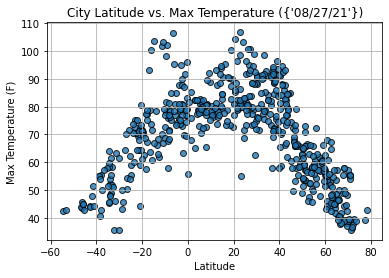

In [10]:
plt.scatter(lats,
           max_temps,
           edgecolor='black', linewidth=1, marker="o",
           alpha=0.8, label="Cities")
plt.title("City Latitude vs. Max Temperature (%s)" % {time.strftime("%x")})
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()

## Latitude vs. Humidity Plot

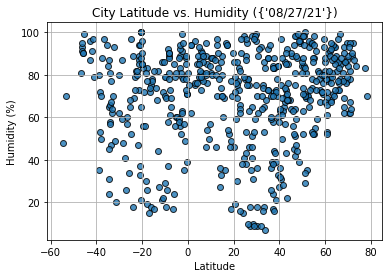

In [11]:
plt.scatter(lats,
           humidity,
           edgecolor='black', linewidth=1, marker="o",
           alpha=0.8, label="Cities")
plt.title("City Latitude vs. Humidity (%s)" % {time.strftime("%x")})
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
          
plt.show()

## Latitude vs. Cloudiness Plot

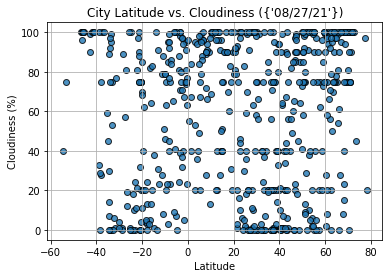

In [12]:
plt.scatter(lats,
           cloudiness,
           edgecolor='black', linewidth=1, marker="o",
           alpha=0.8, label="Cities")
plt.title("City Latitude vs. Cloudiness (%s)" % {time.strftime("%x")})
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
          
plt.show()

## Latitude vs. Wind Speed Plot

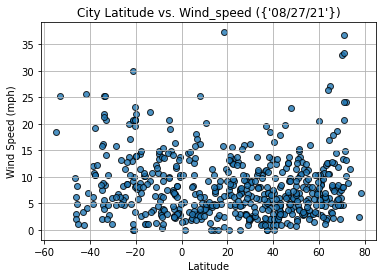

In [13]:
plt.scatter(lats,
           wind_speed,
           edgecolor='black', linewidth=1, marker="o",
           alpha=0.8, label="Cities")
plt.title("City Latitude vs. Wind_speed (%s)" % {time.strftime("%x")})
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
          
plt.show()

## Linear Regression

In [24]:
def plot_linear_regression(x_values, y_values, title, text_coordinate):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = "+ str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinate, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-squared is : {rvalue}")
    plt.show()
    

In [25]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >=0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.749333436961544


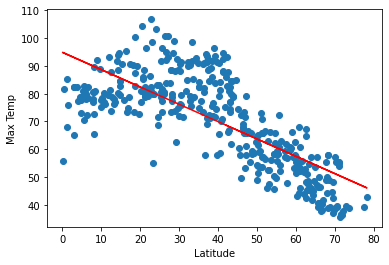

In [26]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (6,30))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.789612389025911


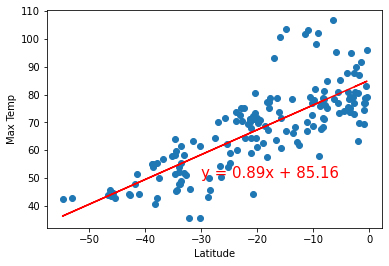

In [27]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (-30,50))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.13876471505577753


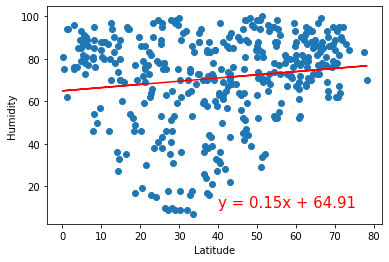

In [28]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (40,10))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : -0.07284880427429229


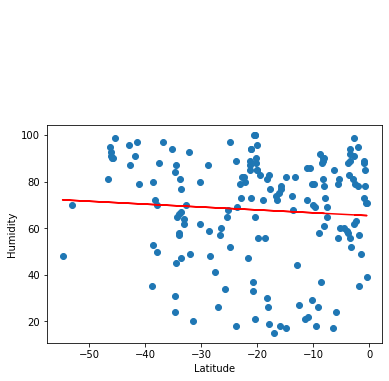

In [30]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (-30,150))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.044017777712089326


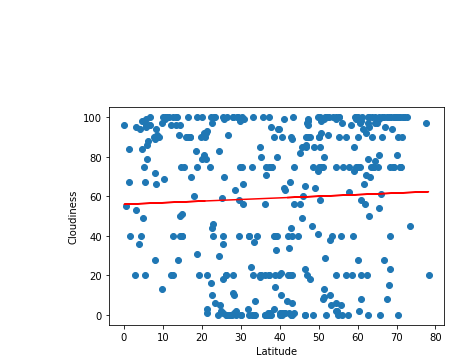

In [31]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (-30,150))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : -0.0033185545572275224


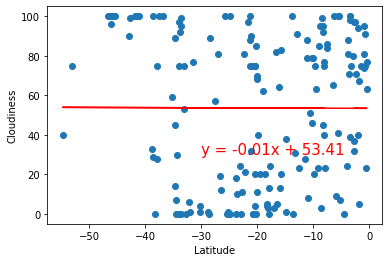

In [32]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (-30,30))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.14621504770123617


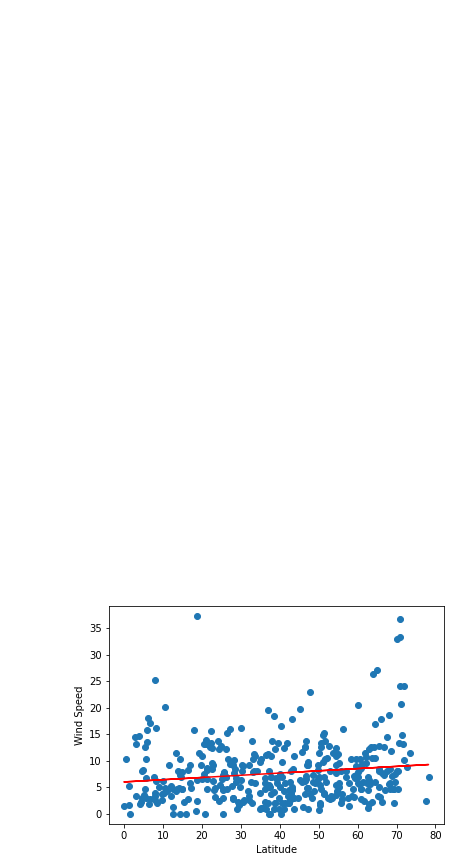

In [33]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (-30,150))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.1318236198034311


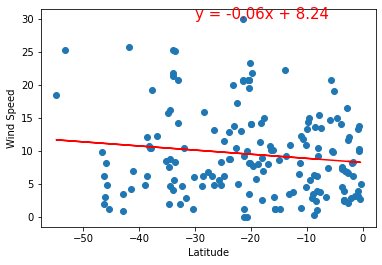

In [34]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (-30,30))